In [1]:
import pandas as pd
import numpy as np
from datetime import datetime


In [2]:
df99 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")

In [3]:
df99.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
df99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [5]:
df99.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [6]:
df99.shape

(287196, 10)

In [7]:
# Convert 'month' column to 'yyyy-mm' format
df99['month'] = pd.to_datetime(df99['month']).dt.to_period('M')

# Convert 'lease_commence_date' to 'yyyy-mm' format (using the first day of the month)
df99['lease_commence_date'] = pd.to_datetime(df99['lease_commence_date'], format='%Y').dt.to_period('M')

# Convert other categorical columns to categorical type
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
df99[categorical_columns] = df99[categorical_columns].astype(str)

In [8]:
df99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype    
---  ------               --------------   -----    
 0   month                287196 non-null  period[M]
 1   town                 287196 non-null  object   
 2   flat_type            287196 non-null  object   
 3   block                287196 non-null  object   
 4   street_name          287196 non-null  object   
 5   storey_range         287196 non-null  object   
 6   floor_area_sqm       287196 non-null  float64  
 7   flat_model           287196 non-null  object   
 8   lease_commence_date  287196 non-null  period[M]
 9   resale_price         287196 non-null  int64    
dtypes: float64(1), int64(1), object(6), period[M](2)
memory usage: 21.9+ MB


In [9]:
df99.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01,47200


In [10]:
df99['lease_commence_date'] 

0         1977-01
1         1977-01
2         1977-01
3         1977-01
4         1976-01
           ...   
287191    1987-01
287192    1988-01
287193    1988-01
287194    1988-01
287195    1988-01
Name: lease_commence_date, Length: 287196, dtype: period[M]

In [11]:
df99.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [12]:
current_year = pd.to_datetime('now').year
total_lease_year  = 99 + df99['lease_commence_date'].dt.year
df99['current_remaining_lease_years'] = total_lease_year - current_year

C:\Users\shali\AppData\Local\Temp\ipykernel_15904\1693844745.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


In [13]:
df99.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,current_remaining_lease_years
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01,9000,53
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01,6000,53
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01,8000,53
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01,6000,53
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01,47200,52


In [14]:
df99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   month                          287196 non-null  period[M]
 1   town                           287196 non-null  object   
 2   flat_type                      287196 non-null  object   
 3   block                          287196 non-null  object   
 4   street_name                    287196 non-null  object   
 5   storey_range                   287196 non-null  object   
 6   floor_area_sqm                 287196 non-null  float64  
 7   flat_model                     287196 non-null  object   
 8   lease_commence_date            287196 non-null  period[M]
 9   resale_price                   287196 non-null  int64    
 10  current_remaining_lease_years  287196 non-null  int64    
dtypes: float64(1), int64(2), object(6), period[M](2)
memory usage: 24

In [15]:
# Assuming you want to find the lease duration till the current date
current_date = datetime.now()
df99['property_current_age'] = current_date.year - df99['lease_commence_date'].dt.year

In [16]:
df99.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,current_remaining_lease_years,property_current_age
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987-01,456000,63,36
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988-01,408000,64,35
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988-01,469000,64,35
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988-01,440000,64,35
287195,1999-12,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,145.0,MAISONETTE,1988-01,484000,64,35


In [17]:
df99['floor_area_sqm']

0          31.0
1          31.0
2          31.0
3          31.0
4          73.0
          ...  
287191    142.0
287192    142.0
287193    146.0
287194    146.0
287195    145.0
Name: floor_area_sqm, Length: 287196, dtype: float64

In [18]:
df99['floor_area_sqm'] = df99['floor_area_sqm'].astype('int64')

In [19]:
# Calculate 'price_per_sqm'
df99['price_per_sqm'] = df99['resale_price'] / df99['floor_area_sqm']

df99['price_per_sqm'] = df99['price_per_sqm'].astype('int64')

In [20]:
# Extract the 'resale_price' column
resale_price_column = df99['resale_price']  

# Drop the 'resale_price' column from the DataFrame
df99 = df99.drop(columns=['resale_price'])

# Add the 'resale_price' column to the end of the DataFrame
df99['resale_price'] = resale_price_column

# Assuming your DataFrame is named 'df99'
df99['resale_price'] = df99['resale_price'].astype('int64')

In [21]:
df99.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31,IMPROVED,1977-01,53,46,290,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31,IMPROVED,1977-01,53,46,193,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31,IMPROVED,1977-01,53,46,258,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31,IMPROVED,1977-01,53,46,193,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73,NEW GENERATION,1976-01,52,47,646,47200


In [22]:
df99.shape

(287196, 13)

In [23]:
df99.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142,APARTMENT,1987-01,63,36,3211,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142,APARTMENT,1988-01,64,35,2873,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146,MAISONETTE,1988-01,64,35,3212,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146,MAISONETTE,1988-01,64,35,3013,440000
287195,1999-12,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,145,MAISONETTE,1988-01,64,35,3337,484000


In [24]:
df99.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
current_remaining_lease_years    0
property_current_age             0
price_per_sqm                    0
resale_price                     0
dtype: int64

In [25]:
df12 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

In [26]:
df12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [27]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


In [28]:
df12.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [29]:
df12.shape

(369651, 10)

In [30]:
# Convert 'month' column to 'yyyy-mm' format
df12['month'] = pd.to_datetime(df12['month']).dt.to_period('M')

# Convert 'lease_commence_date' to 'yyyy-mm' format (using the first day of the month)
df12['lease_commence_date'] = pd.to_datetime(df12['lease_commence_date'], format='%Y').dt.to_period('M')

# Convert other categorical columns to categorical type
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
df12[categorical_columns] = df12[categorical_columns].astype(str)

In [31]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype    
---  ------               --------------   -----    
 0   month                369651 non-null  period[M]
 1   town                 369651 non-null  object   
 2   flat_type            369651 non-null  object   
 3   block                369651 non-null  object   
 4   street_name          369651 non-null  object   
 5   storey_range         369651 non-null  object   
 6   floor_area_sqm       369651 non-null  float64  
 7   flat_model           369651 non-null  object   
 8   lease_commence_date  369651 non-null  period[M]
 9   resale_price         369651 non-null  float64  
dtypes: float64(2), object(6), period[M](2)
memory usage: 28.2+ MB


In [32]:
current_year = pd.to_datetime('now').year
total_lease_year  = 98 + df12['lease_commence_date'].dt.year
df12['current_remaining_lease_years'] = total_lease_year - current_year

C:\Users\shali\AppData\Local\Temp\ipykernel_15904\2163530779.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


In [33]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   month                          369651 non-null  period[M]
 1   town                           369651 non-null  object   
 2   flat_type                      369651 non-null  object   
 3   block                          369651 non-null  object   
 4   street_name                    369651 non-null  object   
 5   storey_range                   369651 non-null  object   
 6   floor_area_sqm                 369651 non-null  float64  
 7   flat_model                     369651 non-null  object   
 8   lease_commence_date            369651 non-null  period[M]
 9   resale_price                   369651 non-null  float64  
 10  current_remaining_lease_years  369651 non-null  int64    
dtypes: float64(2), int64(1), object(6), period[M](2)
memory usage: 31

In [34]:
df12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,current_remaining_lease_years
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986-01,147000.0,61
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986-01,144000.0,61
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01,159000.0,51
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01,167000.0,51
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976-01,163000.0,51


In [35]:
# Assuming you want to find the lease duration till the current date
current_date = datetime.now()
df12['property_current_age'] = current_date.year - df12['lease_commence_date'].dt.year

In [36]:
df12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,current_remaining_lease_years,property_current_age
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986-01,147000.0,61,37
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986-01,144000.0,61,37
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01,159000.0,51,47
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01,167000.0,51,47
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976-01,163000.0,51,47


In [37]:
df12['floor_area_sqm']

0          69.0
1          61.0
2          73.0
3          73.0
4          67.0
          ...  
369646    121.0
369647    122.0
369648    122.0
369649    181.0
369650    163.0
Name: floor_area_sqm, Length: 369651, dtype: float64

In [38]:
df12['floor_area_sqm'] = df12['floor_area_sqm'].astype('int64')

In [39]:
# Calculate 'price_per_sqm'
df12['price_per_sqm'] = df12['resale_price'] / df12['floor_area_sqm']

df12['price_per_sqm'] = df12['price_per_sqm'].astype('int64')

In [40]:
df12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,current_remaining_lease_years,property_current_age,price_per_sqm
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69,Improved,1986-01,147000.0,61,37,2130
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61,Improved,1986-01,144000.0,61,37,2360
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73,New Generation,1976-01,159000.0,51,47,2178
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73,New Generation,1976-01,167000.0,51,47,2287
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67,New Generation,1976-01,163000.0,51,47,2432


In [41]:
# Extract the 'resale_price' column
resale_price_column = df12['resale_price']  

# Drop the 'resale_price' column from the DataFrame
df12 = df12.drop(columns=['resale_price'])

# Add the 'resale_price' column to the end of the DataFrame
df12['resale_price'] = resale_price_column

# Assuming your DataFrame is named 'df99'
df12['resale_price'] = df12['resale_price'].astype('int64')

In [42]:
df12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69,Improved,1986-01,61,37,2130,147000
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61,Improved,1986-01,61,37,2360,144000
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73,New Generation,1976-01,51,47,2178,159000
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73,New Generation,1976-01,51,47,2287,167000
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67,New Generation,1976-01,51,47,2432,163000


In [43]:
df12.shape

(369651, 13)

In [44]:
df12.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
current_remaining_lease_years    0
property_current_age             0
price_per_sqm                    0
resale_price                     0
dtype: int64

In [45]:
df14 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [46]:
df14.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [47]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [48]:
# Convert 'month' column to 'yyyy-mm' format
df14['month'] = pd.to_datetime(df14['month']).dt.to_period('M')

# Convert 'lease_commence_date' to 'yyyy-mm' format (using the first day of the month)
df14['lease_commence_date'] = pd.to_datetime(df14['lease_commence_date'], format='%Y').dt.to_period('M')

# Convert other categorical columns to categorical type
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
df14[categorical_columns] = df14[categorical_columns].astype(str)

In [49]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   month                52203 non-null  period[M]
 1   town                 52203 non-null  object   
 2   flat_type            52203 non-null  object   
 3   block                52203 non-null  object   
 4   street_name          52203 non-null  object   
 5   storey_range         52203 non-null  object   
 6   floor_area_sqm       52203 non-null  float64  
 7   flat_model           52203 non-null  object   
 8   lease_commence_date  52203 non-null  period[M]
 9   resale_price         52203 non-null  float64  
dtypes: float64(2), object(6), period[M](2)
memory usage: 4.0+ MB


In [50]:
df14.shape

(52203, 10)

In [51]:
df14.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [52]:
df14['lease_commence_date'] 

0        1986-01
1        1980-01
2        1980-01
3        1984-01
4        1980-01
          ...   
52198    1988-01
52199    1988-01
52200    1992-01
52201    1985-01
52202    1985-01
Name: lease_commence_date, Length: 52203, dtype: period[M]

In [53]:
current_year = pd.to_datetime('now').year
total_lease_year  = 98 + df14['lease_commence_date'].dt.year
df14['current_remaining_lease_years'] = total_lease_year - current_year

C:\Users\shali\AppData\Local\Temp\ipykernel_15904\1660847189.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


In [54]:
df14.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,current_remaining_lease_years
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01,250000.0,61
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01,265000.0,55
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01,315000.0,55
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984-01,320000.0,59
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980-01,321000.0,55


In [55]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype    
---  ------                         --------------  -----    
 0   month                          52203 non-null  period[M]
 1   town                           52203 non-null  object   
 2   flat_type                      52203 non-null  object   
 3   block                          52203 non-null  object   
 4   street_name                    52203 non-null  object   
 5   storey_range                   52203 non-null  object   
 6   floor_area_sqm                 52203 non-null  float64  
 7   flat_model                     52203 non-null  object   
 8   lease_commence_date            52203 non-null  period[M]
 9   resale_price                   52203 non-null  float64  
 10  current_remaining_lease_years  52203 non-null  int64    
dtypes: float64(2), int64(1), object(6), period[M](2)
memory usage: 4.4+ MB


In [56]:
# want to find the lease duration till the current date
current_date = datetime.now()
df14['property_current_age'] = current_date.year - df14['lease_commence_date'].dt.year

In [57]:
df14.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,current_remaining_lease_years,property_current_age
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988-01,580000.0,63,35
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988-01,540000.0,63,35
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992-01,738000.0,67,31
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985-01,592000.0,60,38
52202,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985-01,545000.0,60,38


In [58]:
df14['floor_area_sqm']

0         45.0
1         44.0
2         68.0
3         67.0
4         67.0
         ...  
52198    122.0
52199    146.0
52200    164.0
52201    152.0
52202    146.0
Name: floor_area_sqm, Length: 52203, dtype: float64

In [59]:
df14['floor_area_sqm'] = df14['floor_area_sqm'].astype('int64')

In [60]:
# Calculate 'price_per_sqm'
df14['price_per_sqm'] = df14['resale_price'] / df14['floor_area_sqm']

df14['price_per_sqm'] = df14['price_per_sqm'].astype('int64')

In [61]:
# Extract the 'resale_price' column
resale_price_column = df14['resale_price']  

# Drop the 'resale_price' column from the DataFrame
df14 = df14.drop(columns=['resale_price'])

# Add the 'resale_price' column to the end of the DataFrame
df14['resale_price'] = resale_price_column

# Assuming your DataFrame is named 'df99'
df14['resale_price'] = df14['resale_price'].astype('int64')

In [62]:
df14.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45,Improved,1986-01,61,37,5555,250000
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44,Improved,1980-01,55,43,6022,265000
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68,New Generation,1980-01,55,43,4632,315000
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67,New Generation,1984-01,59,39,4776,320000
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67,New Generation,1980-01,55,43,4791,321000


In [63]:
df16 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [64]:
df16.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [65]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [66]:
df16.shape

(37153, 11)

In [67]:
df16.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [68]:
# Convert 'month' column to 'yyyy-mm' format
df16['month'] = pd.to_datetime(df16['month']).dt.to_period('M')

# Convert 'lease_commence_date' to 'yyyy-mm' format (using the first day of the month)
df16['lease_commence_date'] = pd.to_datetime(df16['lease_commence_date'], format='%Y').dt.to_period('M')

# Convert other categorical columns to categorical type
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
df99[categorical_columns] = df16[categorical_columns].astype(str)

In [69]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   month                37153 non-null  period[M]
 1   town                 37153 non-null  object   
 2   flat_type            37153 non-null  object   
 3   block                37153 non-null  object   
 4   street_name          37153 non-null  object   
 5   storey_range         37153 non-null  object   
 6   floor_area_sqm       37153 non-null  float64  
 7   flat_model           37153 non-null  object   
 8   lease_commence_date  37153 non-null  period[M]
 9   remaining_lease      37153 non-null  int64    
 10  resale_price         37153 non-null  float64  
dtypes: float64(2), int64(1), object(6), period[M](2)
memory usage: 3.1+ MB


In [70]:
df16.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986-01,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981-01,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980-01,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979-01,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980-01,64,290000.0


In [71]:
df16['lease_commence_date'] 

0        1986-01
1        1981-01
2        1980-01
3        1979-01
4        1980-01
          ...   
37148    2000-01
37149    1987-01
37150    1992-01
37151    1988-01
37152    1987-01
Name: lease_commence_date, Length: 37153, dtype: period[M]

In [72]:
current_year = pd.to_datetime('now').year
total_lease_year  = 98 + df16['lease_commence_date'].dt.year
df16['current_remaining_lease_years'] = total_lease_year - current_year


C:\Users\shali\AppData\Local\Temp\ipykernel_15904\2734982890.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


In [73]:
df16.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,current_remaining_lease_years
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986-01,70,255000.0,61
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981-01,65,275000.0,56
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980-01,64,285000.0,55
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979-01,63,290000.0,54
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980-01,64,290000.0,55


In [74]:
df16.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,current_remaining_lease_years
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000-01,82,488000.0,75
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987-01,69,455000.0,62
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992-01,74,778000.0,67
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988-01,70,575000.0,63
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987-01,70,735000.0,62


In [75]:
df16.drop('remaining_lease', axis=1, inplace=True)

In [76]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype    
---  ------                         --------------  -----    
 0   month                          37153 non-null  period[M]
 1   town                           37153 non-null  object   
 2   flat_type                      37153 non-null  object   
 3   block                          37153 non-null  object   
 4   street_name                    37153 non-null  object   
 5   storey_range                   37153 non-null  object   
 6   floor_area_sqm                 37153 non-null  float64  
 7   flat_model                     37153 non-null  object   
 8   lease_commence_date            37153 non-null  period[M]
 9   resale_price                   37153 non-null  float64  
 10  current_remaining_lease_years  37153 non-null  int64    
dtypes: float64(2), int64(1), object(6), period[M](2)
memory usage: 3.1+ MB


In [77]:
# Assuming you want to find the lease duration till the current date
current_date = datetime.now()
df16['property_current_age'] = current_date.year - df16['lease_commence_date'].dt.year

In [78]:
df16['floor_area_sqm']

0         60.0
1         68.0
2         69.0
3         68.0
4         68.0
         ...  
37148    112.0
37149    122.0
37150    181.0
37151    146.0
37152    164.0
Name: floor_area_sqm, Length: 37153, dtype: float64

In [79]:
df16['floor_area_sqm'] = df16['floor_area_sqm'].astype('int64')


In [80]:
# Calculate 'price_per_sqm'
df16['price_per_sqm'] = df16['resale_price'] / df16['floor_area_sqm']

df16['price_per_sqm'] = df16['price_per_sqm'].astype('int64')

In [81]:
# Extract the 'resale_price' column
resale_price_column = df16['resale_price']  

# Drop the 'resale_price' column from the DataFrame
df16 = df16.drop(columns=['resale_price'])

# Add the 'resale_price' column to the end of the DataFrame
df16['resale_price'] = resale_price_column

# Assuming your DataFrame is named 'df99'
df16['resale_price'] = df16['resale_price'].astype('int64')

In [82]:
df16.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60,Improved,1986-01,61,37,4250,255000
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68,New Generation,1981-01,56,42,4044,275000
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69,New Generation,1980-01,55,43,4130,285000
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68,New Generation,1979-01,54,44,4264,290000
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68,New Generation,1980-01,55,43,4264,290000


In [83]:
df23 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [84]:
df23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [85]:
df23.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165159 entries, 0 to 165158
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                165159 non-null  object 
 1   town                 165159 non-null  object 
 2   flat_type            165159 non-null  object 
 3   block                165159 non-null  object 
 4   street_name          165159 non-null  object 
 5   storey_range         165159 non-null  object 
 6   floor_area_sqm       165159 non-null  float64
 7   flat_model           165159 non-null  object 
 8   lease_commence_date  165159 non-null  int64  
 9   remaining_lease      165159 non-null  object 
 10  resale_price         165159 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.9+ MB


In [86]:
df23.shape

(165159, 11)

In [87]:
df23.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [88]:
# Convert 'month' column to 'yyyy-mm' format
df23['month'] = pd.to_datetime(df23['month']).dt.to_period('M')

# Convert 'lease_commence_date' to 'yyyy-mm' format (using the first day of the month)
df23['lease_commence_date'] = pd.to_datetime(df23['lease_commence_date'], format='%Y').dt.to_period('M')

# Convert other categorical columns to categorical type
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
df23[categorical_columns] = df23[categorical_columns].astype(str)


In [89]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165159 entries, 0 to 165158
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype    
---  ------               --------------   -----    
 0   month                165159 non-null  period[M]
 1   town                 165159 non-null  object   
 2   flat_type            165159 non-null  object   
 3   block                165159 non-null  object   
 4   street_name          165159 non-null  object   
 5   storey_range         165159 non-null  object   
 6   floor_area_sqm       165159 non-null  float64  
 7   flat_model           165159 non-null  object   
 8   lease_commence_date  165159 non-null  period[M]
 9   remaining_lease      165159 non-null  object   
 10  resale_price         165159 non-null  float64  
dtypes: float64(2), object(7), period[M](2)
memory usage: 13.9+ MB


In [90]:
df23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-01,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-01,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01,62 years 05 months,265000.0


In [91]:
df23['lease_commence_date'] 

0         1979-01
1         1978-01
2         1980-01
3         1980-01
4         1980-01
           ...   
165154    2013-01
165155    1987-01
165156    1988-01
165157    2015-01
165158    2016-01
Name: lease_commence_date, Length: 165159, dtype: period[M]

In [92]:
df23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-01,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-01,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01,62 years 05 months,265000.0


In [93]:
df23.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
165154,2023-11,YISHUN,4 ROOM,454,YISHUN ST 41,04 TO 06,93.0,Model A,2013-01,88 years 10 months,540000.0
165155,2023-11,YISHUN,4 ROOM,626,YISHUN ST 61,04 TO 06,83.0,Simplified,1987-01,62 years 07 months,480000.0
165156,2023-11,YISHUN,4 ROOM,851,YISHUN ST 81,04 TO 06,104.0,Model A,1988-01,63 years 05 months,520000.0
165157,2023-11,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112.0,Improved,2015-01,91 years,645000.0
165158,2023-11,YISHUN,5 ROOM,342C,YISHUN RING RD,13 TO 15,113.0,Premium Apartment,2016-01,91 years 03 months,700000.0


In [94]:
current_year = pd.to_datetime('now').year
total_lease_year  = 98 + df23['lease_commence_date'].dt.year
df23['current_remaining_lease_years'] = total_lease_year - current_year

C:\Users\shali\AppData\Local\Temp\ipykernel_15904\96546085.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


In [95]:
df23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,current_remaining_lease_years
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01,61 years 04 months,232000.0,54
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-01,60 years 07 months,250000.0,53
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01,62 years 05 months,262000.0,55
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-01,62 years 01 month,265000.0,55
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01,62 years 05 months,265000.0,55


In [96]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165159 entries, 0 to 165158
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   month                          165159 non-null  period[M]
 1   town                           165159 non-null  object   
 2   flat_type                      165159 non-null  object   
 3   block                          165159 non-null  object   
 4   street_name                    165159 non-null  object   
 5   storey_range                   165159 non-null  object   
 6   floor_area_sqm                 165159 non-null  float64  
 7   flat_model                     165159 non-null  object   
 8   lease_commence_date            165159 non-null  period[M]
 9   remaining_lease                165159 non-null  object   
 10  resale_price                   165159 non-null  float64  
 11  current_remaining_lease_years  165159 non-null  int64    
dtypes:

In [97]:
df23.drop('remaining_lease', axis=1, inplace=True)

In [98]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165159 entries, 0 to 165158
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   month                          165159 non-null  period[M]
 1   town                           165159 non-null  object   
 2   flat_type                      165159 non-null  object   
 3   block                          165159 non-null  object   
 4   street_name                    165159 non-null  object   
 5   storey_range                   165159 non-null  object   
 6   floor_area_sqm                 165159 non-null  float64  
 7   flat_model                     165159 non-null  object   
 8   lease_commence_date            165159 non-null  period[M]
 9   resale_price                   165159 non-null  float64  
 10  current_remaining_lease_years  165159 non-null  int64    
dtypes: float64(2), int64(1), object(6), period[M](2)
memory usage: 13

In [99]:
# Assuming you want to find the lease duration till the current date
current_date = datetime.now()
df23['property_current_age'] = current_date.year - df23['lease_commence_date'].dt.year

In [100]:
df23['floor_area_sqm']


0          44.0
1          67.0
2          67.0
3          68.0
4          67.0
          ...  
165154     93.0
165155     83.0
165156    104.0
165157    112.0
165158    113.0
Name: floor_area_sqm, Length: 165159, dtype: float64

In [101]:
df23['floor_area_sqm'] = df23['floor_area_sqm'].astype('int64')

In [102]:
# Calculate 'price_per_sqm'
df23['price_per_sqm'] = df23['resale_price'] / df23['floor_area_sqm']

df23['price_per_sqm'] = df23['price_per_sqm'].astype('int64')


In [103]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165159 entries, 0 to 165158
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   month                          165159 non-null  period[M]
 1   town                           165159 non-null  object   
 2   flat_type                      165159 non-null  object   
 3   block                          165159 non-null  object   
 4   street_name                    165159 non-null  object   
 5   storey_range                   165159 non-null  object   
 6   floor_area_sqm                 165159 non-null  int64    
 7   flat_model                     165159 non-null  object   
 8   lease_commence_date            165159 non-null  period[M]
 9   resale_price                   165159 non-null  float64  
 10  current_remaining_lease_years  165159 non-null  int64    
 11  property_current_age           165159 non-null  int64    
 12  pr

In [104]:
# Extract the 'resale_price' column
resale_price_column = df23['resale_price']  

# Drop the 'resale_price' column from the DataFrame
df23 = df23.drop(columns=['resale_price'])

# Add the 'resale_price' column to the end of the DataFrame
df23['resale_price'] = resale_price_column

# Assuming your DataFrame is named 'df99'
df23['resale_price'] = df23['resale_price'].astype('int64')

In [105]:
df23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979-01,54,44,5272,232000
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978-01,53,45,3731,250000
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980-01,55,43,3910,262000
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980-01,55,43,3897,265000
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980-01,55,43,3955,265000


In [106]:
# Concatenate the files and creating new file
df = pd.concat([df99, df12, df14, df16, df23]).to_csv('cleaned_SG_resale_flat.csv', index=False)

In [107]:
import pandas as pd

In [108]:
df = pd.read_csv('cleaned_SG_resale_flat.csv',low_memory = False)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
0,1990-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,31,Improved,1977-01,53,46,290,9000
1,1990-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,31,New Generation,1977-01,53,46,193,6000
2,1990-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,31,New Generation,1977-01,53,46,258,8000
3,1990-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,31,New Generation,1977-01,53,46,193,6000
4,1990-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,73,New Generation,1976-01,52,47,646,47200


In [109]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price
911357,2023-11,YISHUN,4 ROOM,454,YISHUN ST 41,04 TO 06,93,Model A,2013-01,88,10,5806,540000
911358,2023-11,YISHUN,4 ROOM,626,YISHUN ST 61,04 TO 06,83,Simplified,1987-01,62,36,5783,480000
911359,2023-11,YISHUN,4 ROOM,851,YISHUN ST 81,04 TO 06,104,Model A,1988-01,63,35,5000,520000
911360,2023-11,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112,Improved,2015-01,90,8,5758,645000
911361,2023-11,YISHUN,5 ROOM,342C,YISHUN RING RD,13 TO 15,113,Premium Apartment,2016-01,91,7,6194,700000


In [110]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'current_remaining_lease_years', 'property_current_age',
       'price_per_sqm', 'resale_price'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911362 entries, 0 to 911361
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   month                          911362 non-null  object
 1   town                           661319 non-null  object
 2   flat_type                      661319 non-null  object
 3   block                          661319 non-null  object
 4   street_name                    661319 non-null  object
 5   storey_range                   661319 non-null  object
 6   floor_area_sqm                 911362 non-null  int64 
 7   flat_model                     661319 non-null  object
 8   lease_commence_date            911362 non-null  object
 9   current_remaining_lease_years  911362 non-null  int64 
 10  property_current_age           911362 non-null  int64 
 11  price_per_sqm                  911362 non-null  int64 
 12  resale_price                   911362 non-nu

In [112]:
df.shape

(911362, 13)

In [113]:
df.isnull().sum()

month                                 0
town                             250043
flat_type                        250043
block                            250043
street_name                      250043
storey_range                     250043
floor_area_sqm                        0
flat_model                       250043
lease_commence_date                   0
current_remaining_lease_years         0
property_current_age                  0
price_per_sqm                         0
resale_price                          0
dtype: int64

In [114]:
df.shape

(911362, 13)

In [115]:
df.dropna(inplace = True)

In [116]:
df.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
current_remaining_lease_years    0
property_current_age             0
price_per_sqm                    0
resale_price                     0
dtype: int64

In [117]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 661319 entries, 0 to 911361
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   month                          661319 non-null  object
 1   town                           661319 non-null  object
 2   flat_type                      661319 non-null  object
 3   block                          661319 non-null  object
 4   street_name                    661319 non-null  object
 5   storey_range                   661319 non-null  object
 6   floor_area_sqm                 661319 non-null  int64 
 7   flat_model                     661319 non-null  object
 8   lease_commence_date            661319 non-null  object
 9   current_remaining_lease_years  661319 non-null  int64 
 10  property_current_age           661319 non-null  int64 
 11  price_per_sqm                  661319 non-null  int64 
 12  resale_price                   661319 non-nu

In [118]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

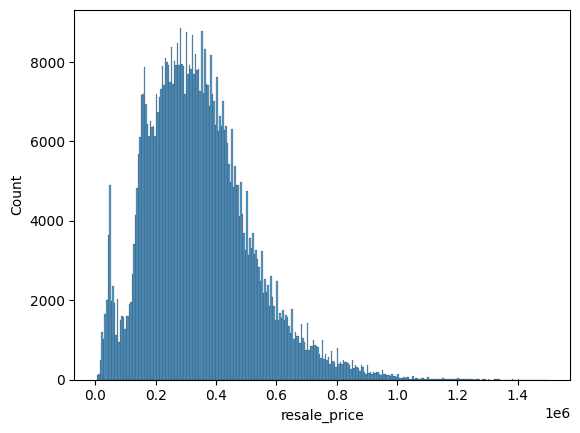

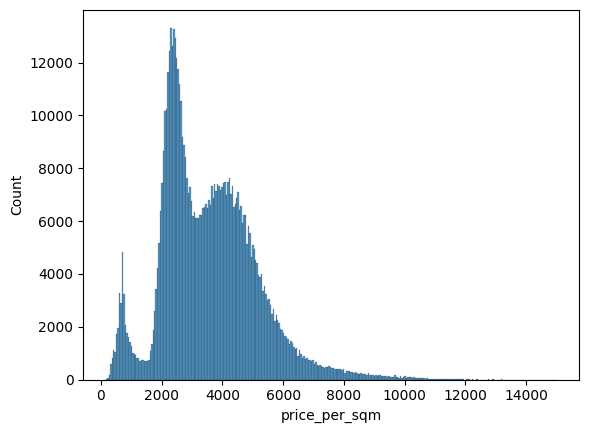

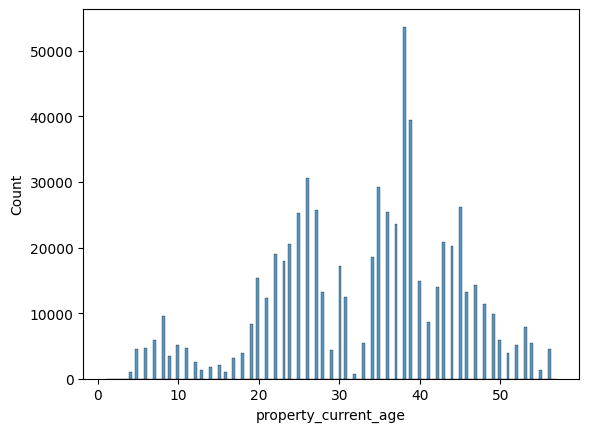

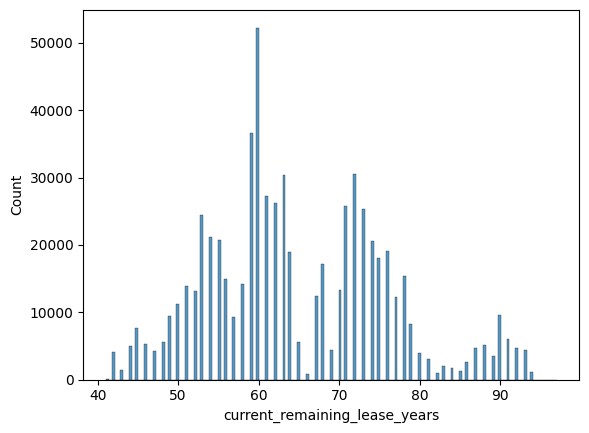

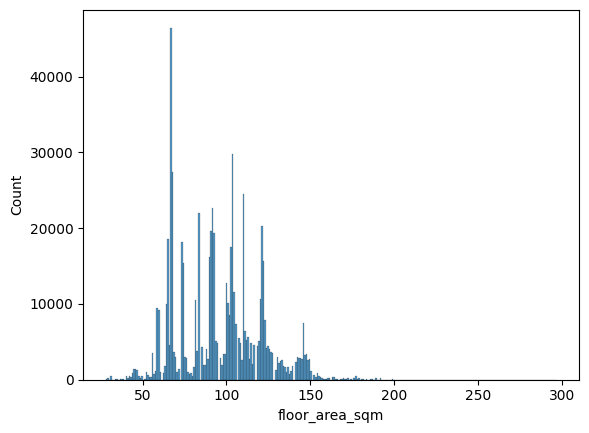

In [119]:
"""['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'current_remaining_lease_years', 'property_current_age',
       'price_per_sqm', 'resale_price']
"""

df['month']   # skewed
df['town']
df['flat_type']
df['block']       # skewed
df['street_name']           
df['storey_range']   # skewed
df['floor_area_sqm']
df['flat_model']
df['lease_commence_date']
df['current_remaining_lease_years']
df['property_current_age']
df['price_per_sqm']
df['resale_price']




import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['resale_price'])
plt.show()
sns.histplot(df['price_per_sqm'])
plt.show()
sns.histplot(df['property_current_age'])
plt.show()
sns.histplot(df['current_remaining_lease_years'])
plt.show()
sns.histplot(df['floor_area_sqm'])
plt.show()


In [120]:
import pandas as pd

# Assuming 'month' and 'lease_commence_date' are datetime columns in your DataFrame 'df'
df['month'] = pd.to_datetime(df['month'])
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'])

# Separate month and year into new columns
df['month_month'] = df['month'].dt.month
df['month_year'] = df['month'].dt.year

df['lease_month'] = df['lease_commence_date'].dt.month
df['lease_commence_year'] = df['lease_commence_date'].dt.year

In [121]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price,month_month,month_year,lease_month,lease_commence_year
0,1990-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,31,Improved,1977-01-01,53,46,290,9000,1,1990,1,1977
1,1990-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,31,New Generation,1977-01-01,53,46,193,6000,1,1990,1,1977
2,1990-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,31,New Generation,1977-01-01,53,46,258,8000,1,1990,1,1977
3,1990-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,31,New Generation,1977-01-01,53,46,193,6000,1,1990,1,1977
4,1990-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,73,New Generation,1976-01-01,52,47,646,47200,1,1990,1,1976


In [122]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price,month_month,month_year,lease_month,lease_commence_year
911357,2023-11-01,YISHUN,4 ROOM,454,YISHUN ST 41,04 TO 06,93,Model A,2013-01-01,88,10,5806,540000,11,2023,1,2013
911358,2023-11-01,YISHUN,4 ROOM,626,YISHUN ST 61,04 TO 06,83,Simplified,1987-01-01,62,36,5783,480000,11,2023,1,1987
911359,2023-11-01,YISHUN,4 ROOM,851,YISHUN ST 81,04 TO 06,104,Model A,1988-01-01,63,35,5000,520000,11,2023,1,1988
911360,2023-11-01,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112,Improved,2015-01-01,90,8,5758,645000,11,2023,1,2015
911361,2023-11-01,YISHUN,5 ROOM,342C,YISHUN RING RD,13 TO 15,113,Premium Apartment,2016-01-01,91,7,6194,700000,11,2023,1,2016


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661319 entries, 0 to 911361
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   month                          661319 non-null  datetime64[ns]
 1   town                           661319 non-null  object        
 2   flat_type                      661319 non-null  object        
 3   block                          661319 non-null  object        
 4   street_name                    661319 non-null  object        
 5   storey_range                   661319 non-null  object        
 6   floor_area_sqm                 661319 non-null  int64         
 7   flat_model                     661319 non-null  object        
 8   lease_commence_date            661319 non-null  datetime64[ns]
 9   current_remaining_lease_years  661319 non-null  int64         
 10  property_current_age           661319 non-null  int64         
 11  

In [124]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,current_remaining_lease_years,property_current_age,price_per_sqm,resale_price,month_month,month_year,lease_month,lease_commence_year
0,1990-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,31,Improved,1977-01-01,53,46,290,9000,1,1990,1,1977
1,1990-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,31,New Generation,1977-01-01,53,46,193,6000,1,1990,1,1977
2,1990-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,31,New Generation,1977-01-01,53,46,258,8000,1,1990,1,1977
3,1990-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,31,New Generation,1977-01-01,53,46,193,6000,1,1990,1,1977
4,1990-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,73,New Generation,1976-01-01,52,47,646,47200,1,1990,1,1976


In [125]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'current_remaining_lease_years', 'property_current_age',
       'price_per_sqm', 'resale_price', 'month_month', 'month_year',
       'lease_month', 'lease_commence_year'],
      dtype='object')

In [126]:
# Drop the original datetime columns if their extracted information is stored in 'month_year' and 'lease_year'
df = df.drop(['month', 'lease_commence_date','lease_month','current_remaining_lease_years','property_current_age','price_per_sqm'], axis=1)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661319 entries, 0 to 911361
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   town                 661319 non-null  object
 1   flat_type            661319 non-null  object
 2   block                661319 non-null  object
 3   street_name          661319 non-null  object
 4   storey_range         661319 non-null  object
 5   floor_area_sqm       661319 non-null  int64 
 6   flat_model           661319 non-null  object
 7   resale_price         661319 non-null  int64 
 8   month_month          661319 non-null  int64 
 9   month_year           661319 non-null  int64 
 10  lease_commence_year  661319 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 60.5+ MB


In [128]:
# Define categorical columns for target encoding
#categorical_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
#floor_area_sqm, month_month, month_year, lease_commence_year 

In [129]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# List of categorical columns
categorical_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']

transformed_categorical = encoder.fit_transform(df[categorical_cols])



df[categorical_cols] = transformed_categorical

In [130]:
X = df[['town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'month_month', 'month_year', 'lease_commence_year']]
Y = df['resale_price']
print(X)
print(Y)

        town  flat_type   block  street_name  storey_range  floor_area_sqm  \
0        0.0        2.0   261.0         16.0           4.0              31   
1        0.0        2.0  1611.0         13.0           0.0              31   
2        0.0        2.0   215.0         16.0           0.0              31   
3        0.0        2.0  1255.0         13.0           0.0              31   
4        0.0        2.0  1641.0         13.0           4.0              73   
...      ...        ...     ...          ...           ...             ...   
911357  25.0        3.0  1289.0        557.0           2.0              93   
911358  25.0        3.0  1800.0        559.0           2.0              83   
911359  25.0        3.0  2395.0        562.0           2.0             104   
911360  25.0        4.0   862.0        548.0           2.0             112   
911361  25.0        4.0   979.0        551.0           7.0             113   

        flat_model  month_month  month_year  lease_commence_yea

In [131]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Transform and assign back to X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#town  flat_type   block  street_name  storey_range  floor_area_sqm  flat_model  month_month  month_year  lease_commence_year

In [132]:
print(y_train.dtypes)

int64


In [133]:
print(X_train.shape, y_train.shape)

(462923, 10) (462923,)


In [134]:
print(X_test.shape, y_test.shape)

(198396, 10) (198396,)


In [135]:
print(X)
X.shape

[[-1.65521956 -1.14976468 -1.15522912 ... -1.63886351 -2.33715603
  -1.13459096]
 [-1.65521956 -1.14976468  0.60255272 ... -1.63886351 -2.33715603
  -1.13459096]
 [-1.65521956 -1.14976468 -1.21512391 ... -1.63886351 -2.33715603
  -1.13459096]
 ...
 [ 1.39425324 -0.07526179  1.62336825 ...  1.31721414  1.64905769
  -0.15864978]
 [ 1.39425324  0.99924111 -0.37269069 ...  1.31721414  1.64905769
   2.23684221]
 [ 1.39425324  0.99924111 -0.22034959 ...  1.31721414  1.64905769
   2.32556414]]


(661319, 10)

In [136]:
# Model training - Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Model evaluation - Decision Tree
predictions_dtr = dtr.predict(X_test)
train_score = dtr.score(X_train, y_train)
test_score = dtr.score(X_test, y_test)
mae_dtr = mean_absolute_error(y_test, predictions_dtr)
mse_dtr = mean_squared_error(y_test, predictions_dtr)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, predictions_dtr)

print("Decision Tree Metrics:")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Mean Absolute Error: {mae_dtr}")
print(f"Mean Squared Error: {mse_dtr}")
print(f"Root Mean Squared Error: {rmse_dtr}")
print(f"R2 Score: {r2_dtr}")

Decision Tree Metrics:
Train Score: 0.9998989858056603
Test Score: 0.96489954843474
Mean Absolute Error: 20802.59642527515
Mean Squared Error: 1041816150.1149664
Root Mean Squared Error: 32277.176922943036
R2 Score: 0.96489954843474


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Hyperparameter tuning for Decision Tree Regressor
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model evaluation
print("Best hyperparameters:", grid_search.best_params_)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))


Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
MSE: 1021789623.0261637
MAE: 20287.139612717594
R2 Score: 0.9655742741471637


In [138]:
import pickle

# Load the scaler
with open('scaler_sg.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)
    
# Load the trained models
with open('sg_model.pkl','wb') as file:
    pickle.dump(best_model,file)

In [139]:
import pickle
with open('sg_model.pkl', 'rb') as file:
                model = pickle.load(file)

model_per = model.predict([[1.76018998,8.51001632,1.09602068,9.93298578,-1.26369361,-3.7317694,66.47452323,2.79525296,-242.23474505,-176.09422811]])
print(model_per)



[9133.33333333]
